# Classification report analysis

### Target dataset

In [10]:
TARGET_DATASET = 'TwReyes2013'

In [11]:
# Get project root
path = !pwd
report_path = '{}/{}/{}'.format('/'.join(path[0].split('/')[:-1]), 'reports', TARGET_DATASET)

Read all reports file

In [12]:
import os
report_file_list = [file for file in os.listdir(report_path) if file.split('.')[-1] == 'json']
report_file_list

['bow-pp$DecisionTreeClassifier.json',
 'bow-pp-pos$SVC.json',
 'bow-pp-emot$SVC.json',
 'bow-pos$SVC.json',
 'bow-pp-pos-emot$SVC.json',
 'bow-pos-emot$SVC.json',
 'bow-pp-emot$DecisionTreeClassifier.json',
 'bow-pp-pos-emot$DecisionTreeClassifier.json',
 'bow-pp$MultinomialNB.json',
 'bow-pos$MultinomialNB.json',
 'bow-pp-pos-emot$MultinomialNB.json',
 'bow-pp-pos$DecisionTreeClassifier.json',
 'bow-pp$SVC.json',
 'bow$DecisionTreeClassifier.json',
 'bow-emot$SVC.json',
 'bow-pos$DecisionTreeClassifier.json',
 'bow-emot$MultinomialNB.json',
 'bow-pp-pos$MultinomialNB.json',
 'bow-pos-emot$DecisionTreeClassifier.json',
 'bow-emot$DecisionTreeClassifier.json',
 'bow$SVC.json',
 'bow-pp-emot$MultinomialNB.json',
 'bow-pos-emot$MultinomialNB.json',
 'bow$MultinomialNB.json']

In [13]:
import json

CLASSIFIER_NAME = {'DecisionTreeClassifier': 'DecisionTree',
				   'SVC': 'SVM',
				   'MultinomialNB': 'MultinomialNB'
				   }
# Read all data
report_list = []
for report_file in report_file_list:	
	with open('{}/{}'.format(report_path, report_file)) as file:
		data = json.load(file)
		# Save data
		out = dict()
		out['classifier'] = CLASSIFIER_NAME[data['classifier']]
		out['features'] = data['features']
		out['confusion-matrix'] = data['overall']['confusion-matrix']
		out.update(data['overall']['report'])
		report_list.append(out)
# Radix sort
report_list.sort(key=lambda x: x['classifier'])
report_list.sort(key=lambda x: x['features'])
report_list.sort(key=lambda x: len(x['features'].split('-')))

In [14]:
from pandas.io.json import json_normalize
df = json_normalize(report_list)
df.head(3)

,False.f1-score,False.precision,False.recall,False.support,True.f1-score,True.precision,True.recall,True.support,accuracy,classifier,confusion-matrix,features,macro avg.f1-score,macro avg.precision,macro avg.recall,macro avg.support,weighted avg.f1-score,weighted avg.precision,weighted avg.recall,weighted avg.support
0,0.910024,0.903078,0.917116,30000.0,0.721361,0.739398,0.704487,10000.0,0.864000,DecisionTree,"[[27514.0, 2486.0], [2954.0, 7046.0]]",bow,0.815693,0.821238,0.810802,40000.0,0.862875,0.862149,0.864000,40000.0
1,0.917592,0.923487,0.911817,30000.0,0.758991,0.745507,0.773294,10000.0,0.877200,MultinomialNB,"[[27355.0, 2645.0], [2267.0, 7733.0]]",bow,0.838291,0.834497,0.842556,40000.0,0.877945,0.878985,0.877200,40000.0
2,0.925559,0.904764,0.947354,30000.0,0.754036,0.816374,0.700746,10000.0,0.885725,SVM,"[[28421.0, 1579.0], [2992.0, 7008.0]]",bow,0.839798,0.860569,0.824050,40000.0,0.882686,0.882654,0.885725,40000.0


In [15]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
%matplotlib inline

FONTSIZE = 22
FONTSIZE_TITLE = 26
plt.rc('font', size=FONTSIZE)
plt.rc('axes', titlesize=FONTSIZE)
colors = get_cmap("Set1").colors
	

In [16]:
reports_list = ['macro avg.precision', 'macro avg.recall', 'macro avg.f1-score', 'accuracy']
report_dict = {'macro avg.precision': 'Precision', 'macro avg.recall': 'Recall', 'macro avg.f1-score': 'F1', 'accuracy': 'Accuracy'}
features_list = df['features'].unique()
# Swap element
features_list[3], features_list[4] = features_list[4], features_list[3]


def evaluate_features_data(classifier):
	plot_values = []
	for feature in features_list:
		values = []
		for report in reports_list:
			value = df[((df['features'] == feature) & (df['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_features(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, 12))
	bar_width = 0.75
	indx = np.arange(len(features_list)) * 4.5
	yndx = [round(x, 3) for x in np.arange(0, 1.05, 0.025)]
	# Data
	for i, (values, report, color) in enumerate(zip(plot_values, reports_list, colors)):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=report_dict[report])
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	min_value = np.min(plot_values)
	plt.ylim(min_value - min_value * 0.1, 1.02)
	# Legend
	ax.legend()
	# Show
	plt.title(classifier_name, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	plt.show()

## Features a confronto

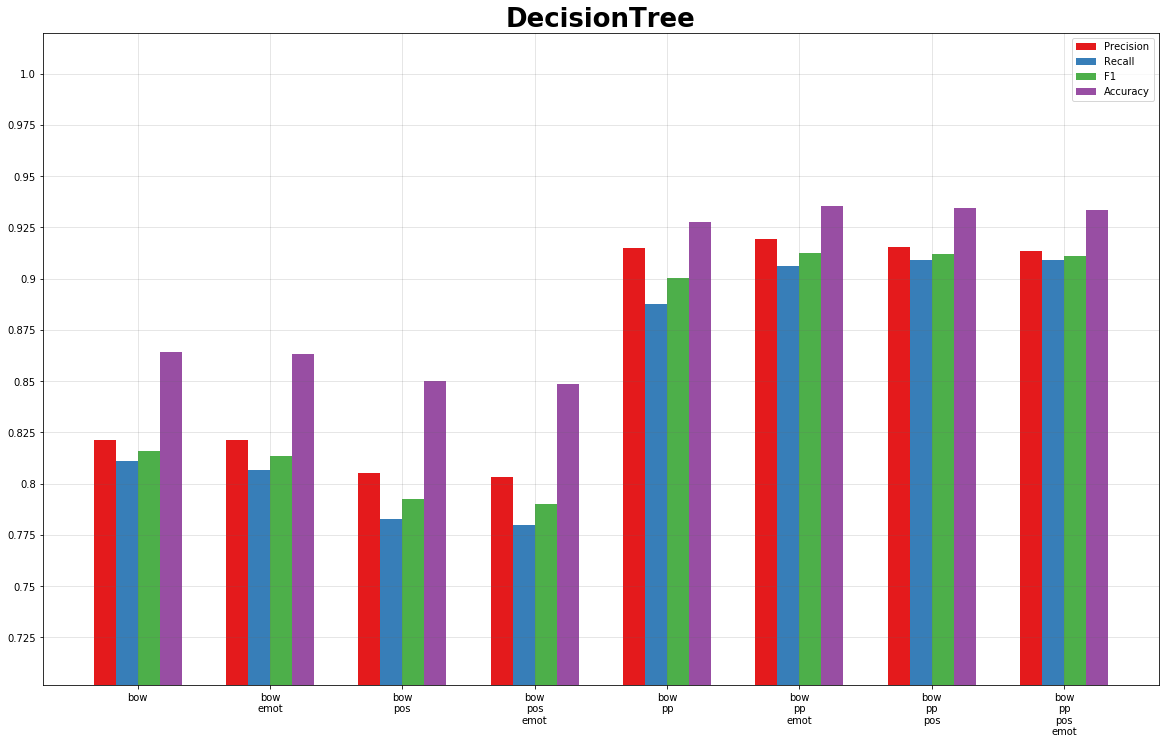

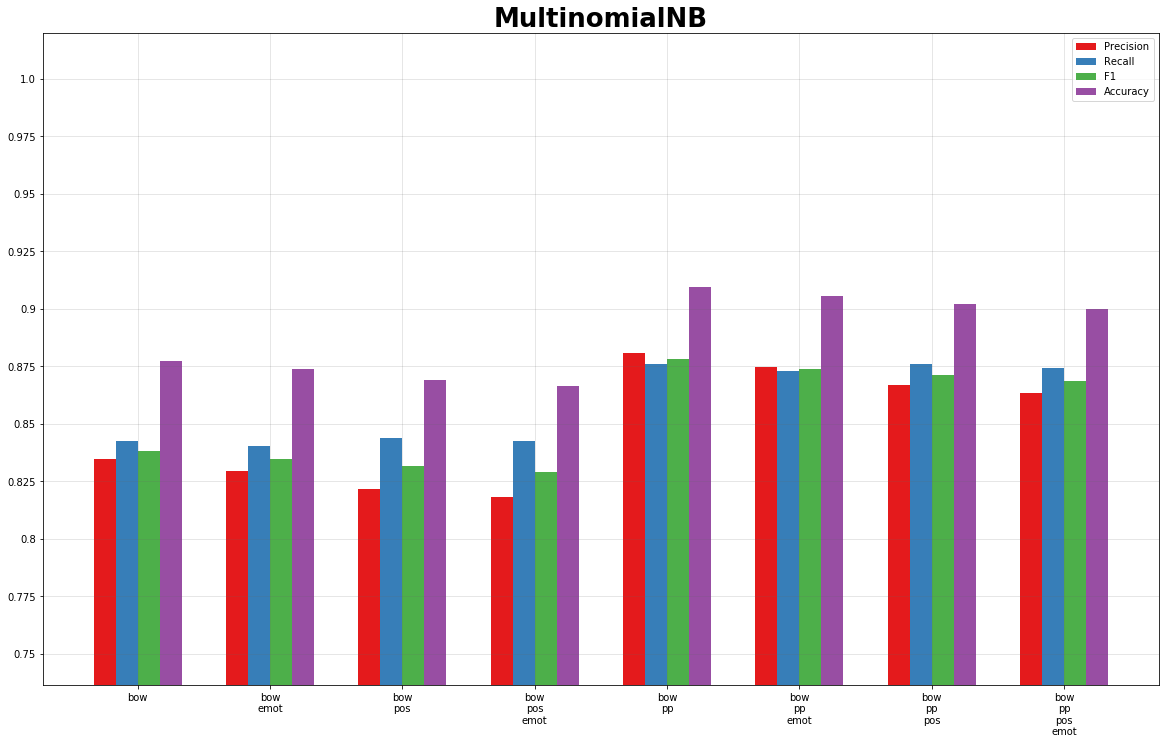

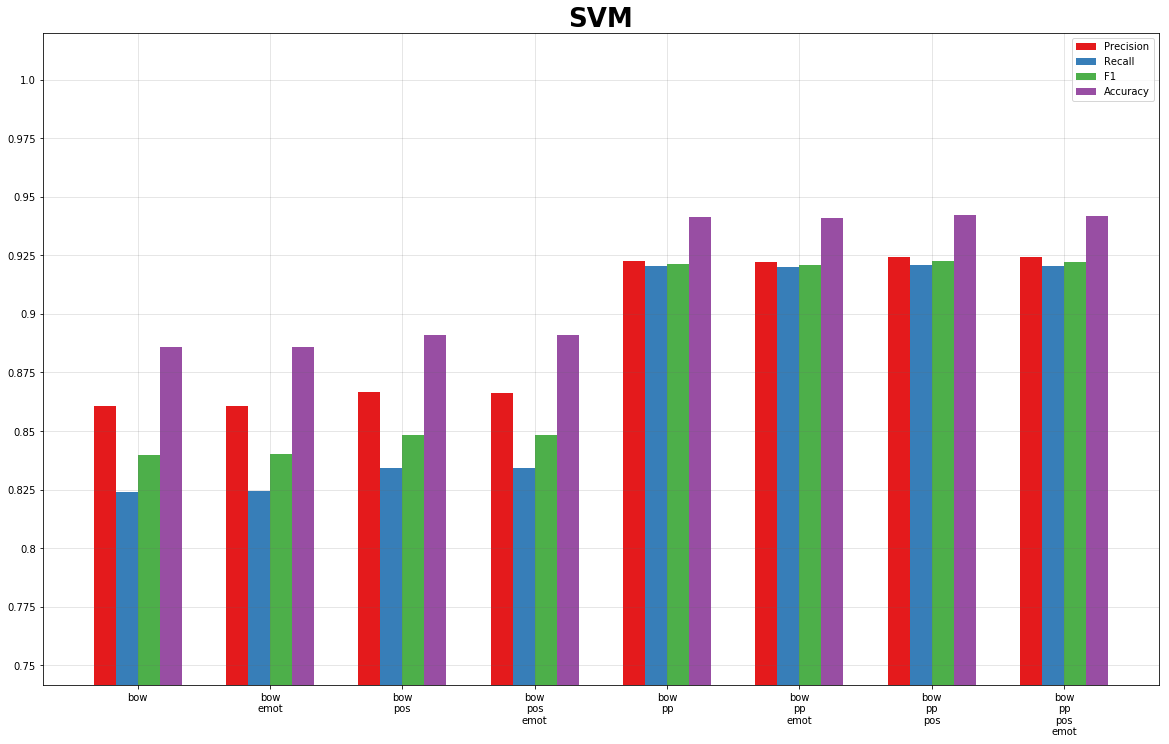

In [17]:
for classifier in df['classifier'].unique():
	values = evaluate_features_data(classifier)
	plot_features(values, classifier)
	

In [18]:
reports_list = ['{}.precision', '{}.recall', '{}.f1-score']
features_list = df['features'].unique()
# Swap element
features_list[3],features_list[4] = features_list[4], features_list[3] 

def evaluate_emotions_data(classifier):
	reports = [r.format('False') for r in reports_list] + [r.format('True') for r in reports_list]
	
	plot_values = []
	for report in reports:
		values = []
		for feature in features_list:
			value = df[((df['features'] == feature) & (df['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_emotions(plot_values, classifier):
	# Figure
	title = '{}'.format(classifier, 'Non ' if type == 'False' else '')
	# Plot
	fig, ax = plt.subplots(figsize=(19, 13))
	bar_width = 0.4
	# Axis idx
	indx = np.arange(len(reports_list) * 2) * 4
	yndx = [round(x, 3) for x in np.arange(0, 1.025, 0.025)]
	# Data
	for i, (values, feature, color) in enumerate(zip(plot_values, features_list, colors)):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=feature)
	# X axis
	ax.set_xticks(indx + bar_width * 3)
	names = ['Precision{}','Recall{}', 'F1{}']
	x_labels = [feature.format('-') for feature in names] + [feature.format('+') for feature in names] 
	ax.set_xticklabels(x_labels)
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	min_value = np.min(plot_values)
	plt.ylim(min_value - min_value * 0.05, 1.10)
	# Legend
	ax.legend()
	plt.title(title, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	# Show
	plt.show()

## Ironic / Non ironic

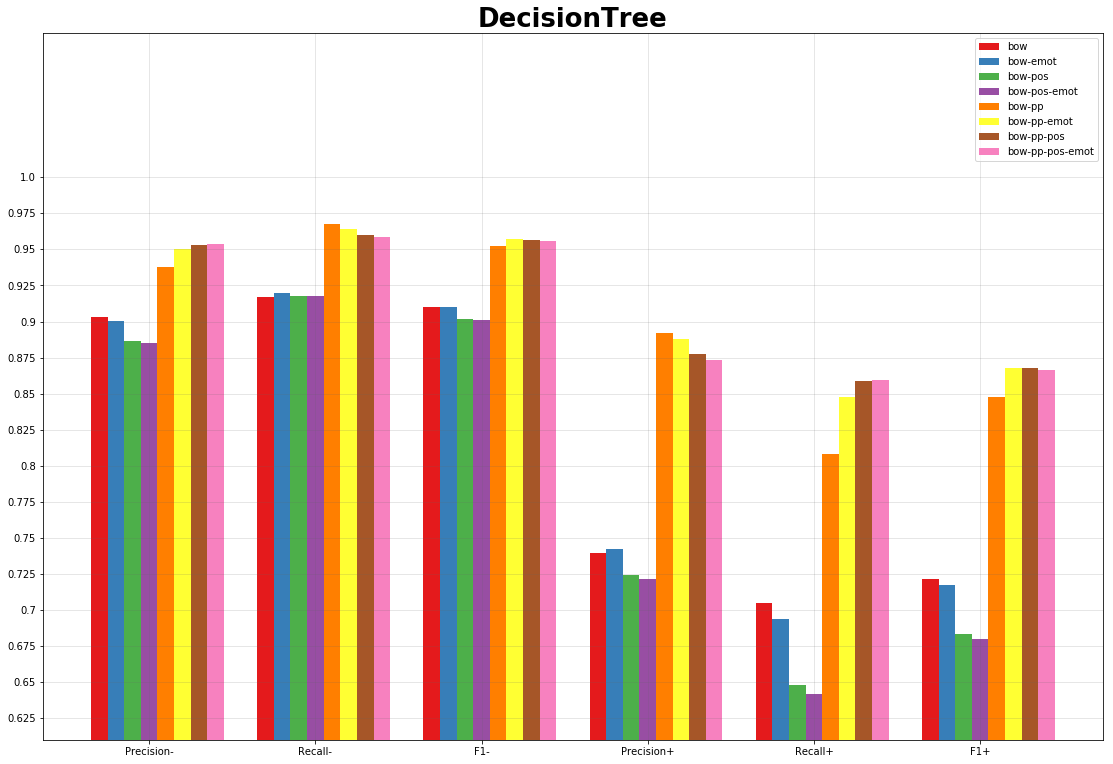

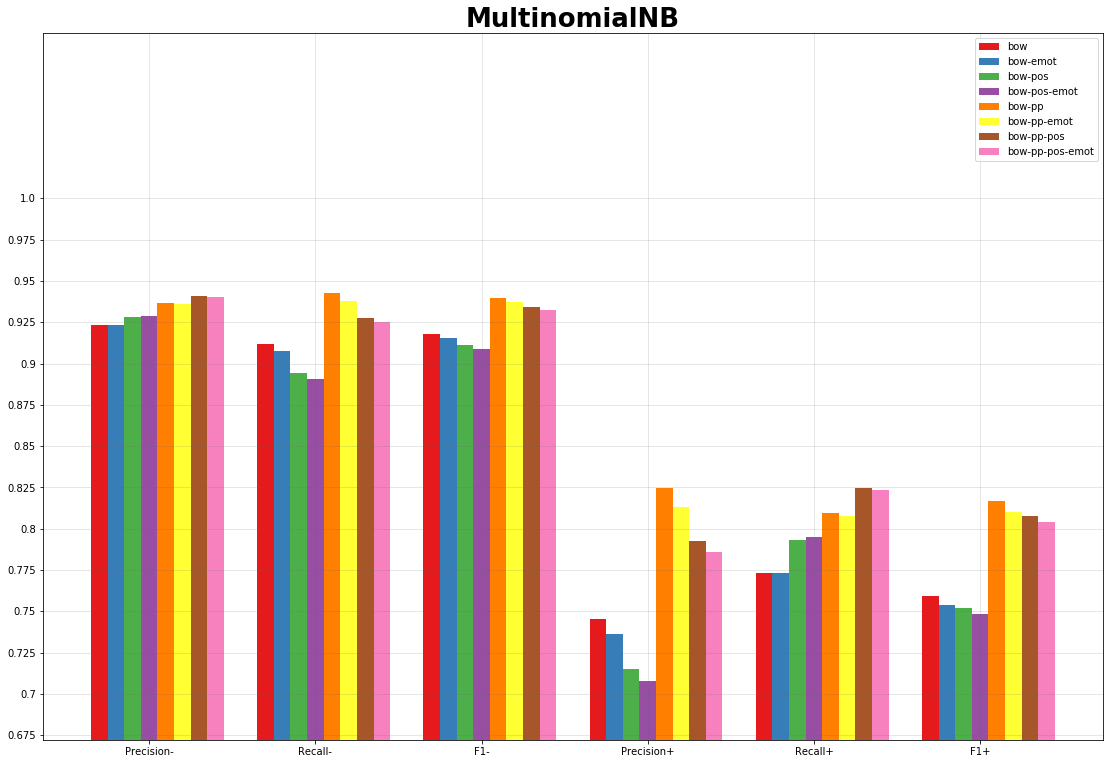

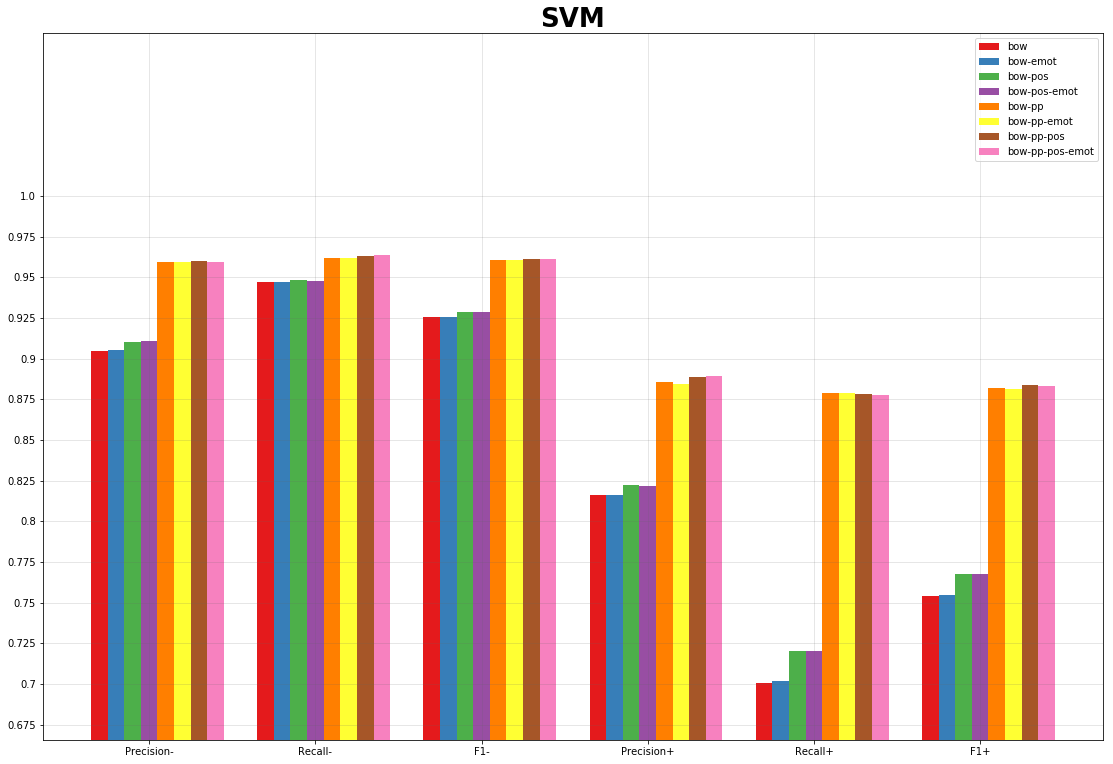

In [19]:
for classifier in df['classifier'].unique():
	emotions_data = evaluate_emotions_data(classifier)
	plot_emotions(emotions_data, classifier)


In [20]:
import seaborn as sns

#features_list = ['bow', 'bow-pos', 'bow-pp', 'bow-pp-pos', 'bow-pp-pos-emot']
features_list = df['features'].unique()
classifer_list = df['classifier'].unique()

def confusion_matrix_data():
	confusion_matrix_list = []
	for feature in features_list:
		values = []
		for classifier in classifer_list:
			matrix = df[((df['features'] == feature) & (df['classifier'] == classifier))]['confusion-matrix']
			values.append(np.array(matrix.values[0]))
		confusion_matrix_list.append(values)
	return confusion_matrix_list


def plot_confusion_matrix(cm, title='Confusion matrix'):
	target_names = ['Non Ironic', 'Ironic']
	sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, vmin=0, vmax=1,  square=True)
	plt.title(title)
	tick_marks = np.arange(len(target_names))
	plt.xticks(tick_marks + 0.5, target_names)
	plt.yticks(tick_marks + 0.5, target_names, va="center", rotation=45)

## Confusion matrix

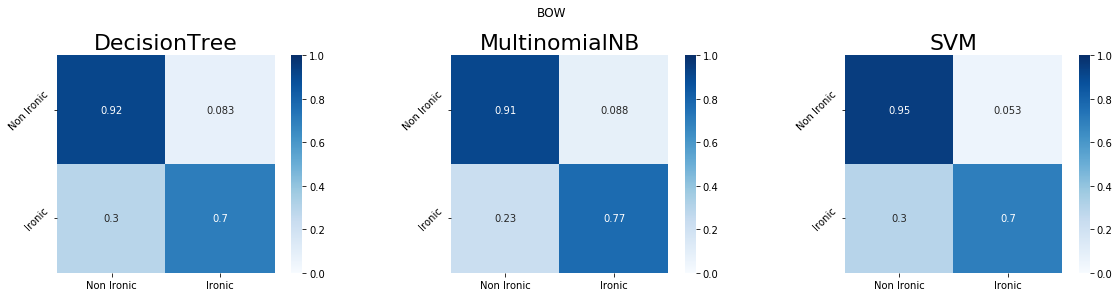

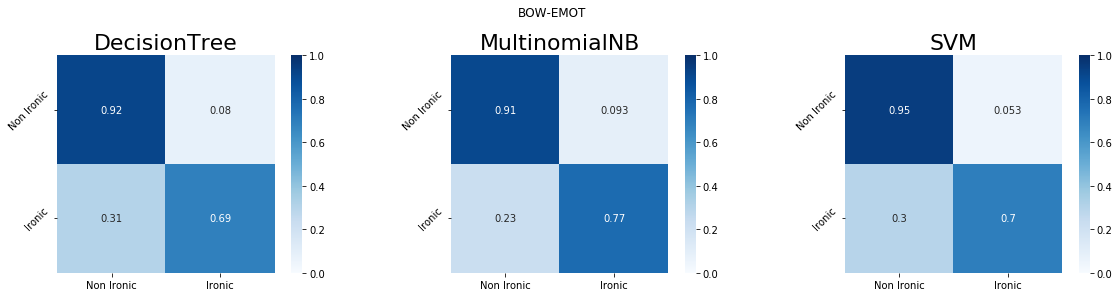

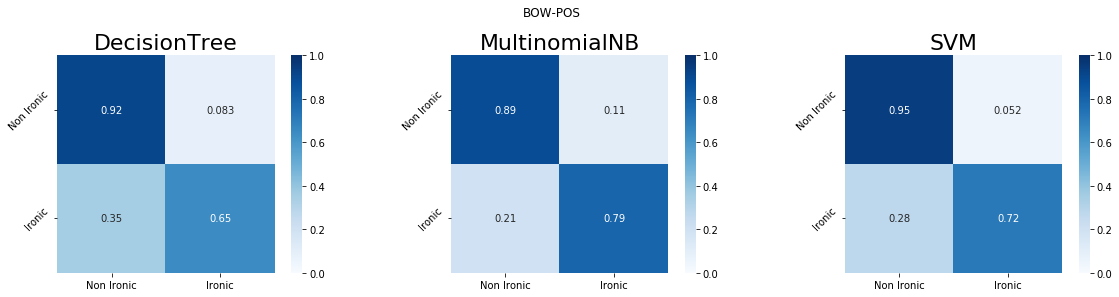

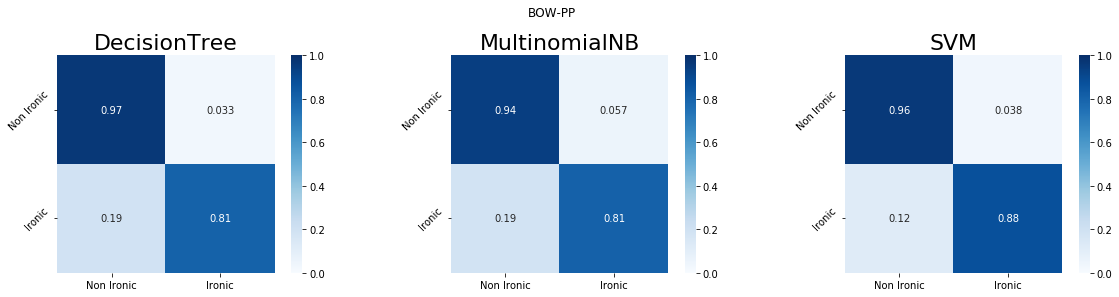

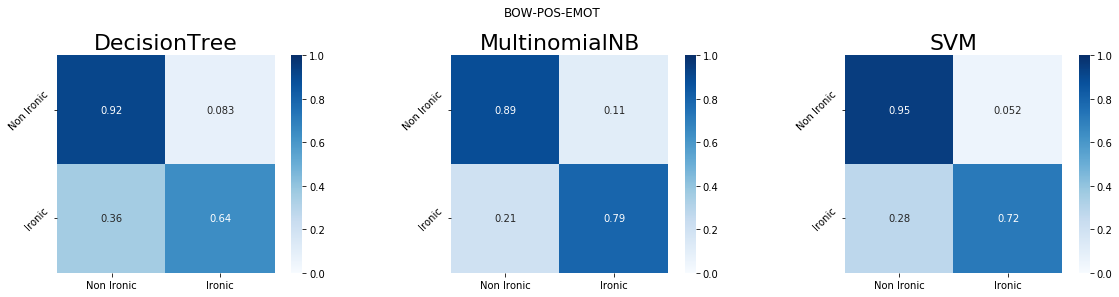

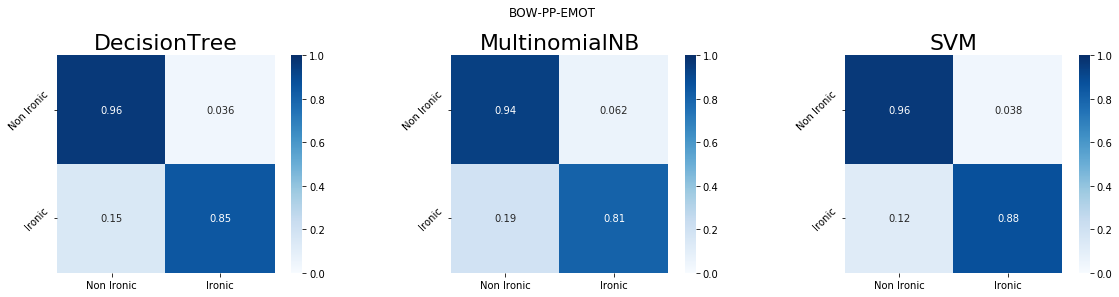

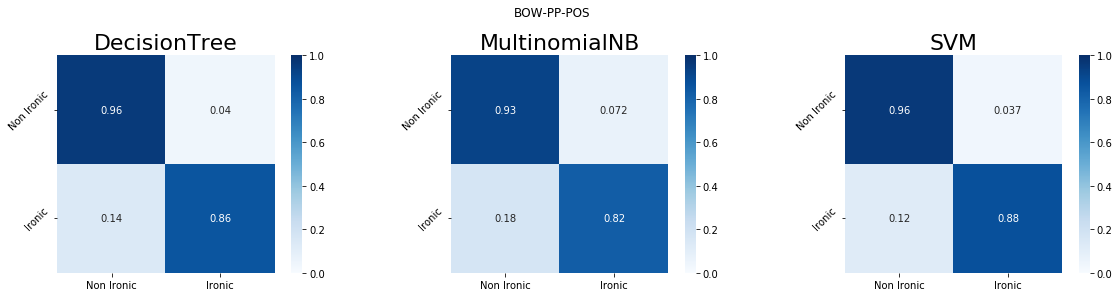

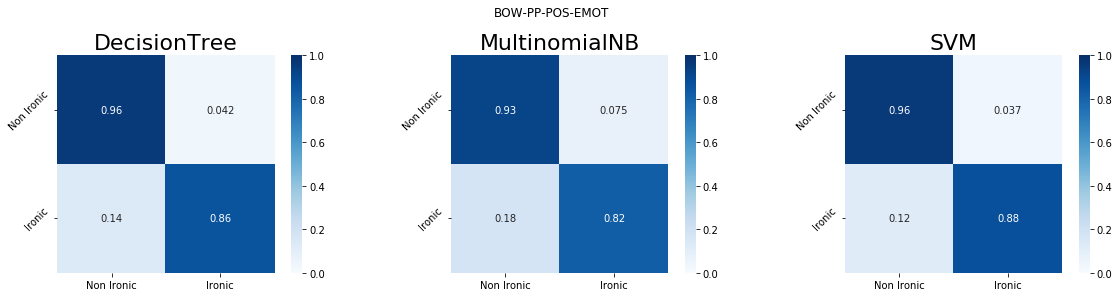

In [21]:
confusion_matrix_list = confusion_matrix_data()

for i, feature in enumerate(features_list):
	plt.figure(figsize=(20, 4))
	for j, classifier in enumerate(classifer_list):	
		# Compute confusion 
		cm = confusion_matrix_list[i][j]
		cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

		plt.subplot(1, len(classifer_list), j+1)
		plot_confusion_matrix(cm_normalized, title=classifier)
	plt.suptitle(feature.upper(), fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'}, y=1.05, ha='center')
	plt.show()

## BOW vs BERT
### BOW vs BERT - accuracy
### BOW vs BERT - f1 measure